In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg
import scipy.constants as consts

In [5]:
df = pd.read_csv("Lab2.csv")
df['R'] = df.apply(lambda row: row['R'] / 100 ,axis = 1)
df['phi'] = df.apply(lambda row: row['phi'] * 1000,axis = 1)
df['r'] = df.apply(lambda row: row['r'] / 100,axis = 1)
df

,phi,R,U,r
0,2500.0,0.0600,60,0.02
1,2500.0,0.0580,60,0.02
2,2500.0,0.0610,60,0.02
3,5000.0,0.0800,60,0.02
4,5000.0,0.0810,60,0.02
5,5000.0,0.0795,60,0.02
6,7500.0,0.0990,60,0.02
7,7500.0,0.1000,60,0.02
8,7500.0,0.1010,60,0.02
9,10000.0,0.1240,60,0.02


In [9]:
data = df.groupby(['U','r','phi'], as_index = False).mean()
data

,U,r,phi,R
0,60,0.02,2500.0,0.059667
1,60,0.02,5000.0,0.080167
2,60,0.02,7500.0,0.100000
3,60,0.02,10000.0,0.124667
4,60,0.02,12500.0,0.150333


In [10]:
k = 1 / (4 * consts.pi * consts.epsilon_0)
print(k)

8987551787.368177


In [11]:
data['Q'] = data.apply(lambda row: row['phi'] * row['r'] / k,axis = 1)
data

,U,r,phi,R,Q
0,60,0.02,2500.0,0.059667,5.563250e-09
1,60,0.02,5000.0,0.080167,1.112650e-08
2,60,0.02,7500.0,0.100000,1.668975e-08
3,60,0.02,10000.0,0.124667,2.225300e-08
4,60,0.02,12500.0,0.150333,2.781625e-08


In [12]:
data['E'] = data.apply(lambda row: k * row['Q'] / row['R']**2,axis = 1)
data

,U,r,phi,R,Q,E
0,60,0.02,2500.0,0.059667,5.563250e-09,14044.505477
1,60,0.02,5000.0,0.080167,1.112650e-08,15560.098720
2,60,0.02,7500.0,0.100000,1.668975e-08,15000.000000
3,60,0.02,10000.0,0.124667,2.225300e-08,12868.540707
4,60,0.02,12500.0,0.150333,2.781625e-08,11061.892518


In [17]:
Q = data['E'][1] * df['R'][0:3]**2 / k
print(Q)

0    6.232660e-09
1    5.824075e-09
2    6.442147e-09
Name: R, dtype: float64


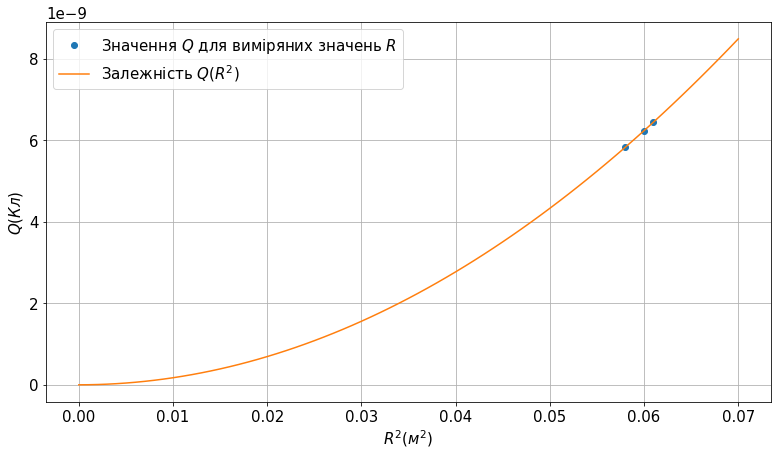

In [29]:
plt.figure(figsize = (13,7))
plt.ylabel("$Q(Кл)$")
plt.rc('font', size=15)
plt.xlabel("$R^2(м^2)$")
plt.grid();

xnew = np.arange(0, np.max(df['R'][0:3]) + 0.01,0.001)
ynew = data['E'][1] * xnew**2 / k

plt.plot(df['R'][0:3], Q, 'o', label = r"Значення $Q$ для виміряних значень $R$")
plt.plot(xnew, ynew, '-', label = r"Залежність $Q(R^2)$")
plt.legend(loc="best");

In [8]:
expData = df[df['phi'] == df['phi'].unique()[0]]
R2Inv = expData.apply(lambda row: 1 / row['R']**2, axis = 1)
E = expData.apply(lambda row: row['phi'] / row['R'], axis = 1)
basis = np.vstack((R2Inv,np.zeros(len(R2Inv)))).T
koef = scipy.linalg.lstsq(basis, E)[0]
print(koef)
print(k * data['Q'][0])

[148.90106318   0.        ]
149.16666666666666


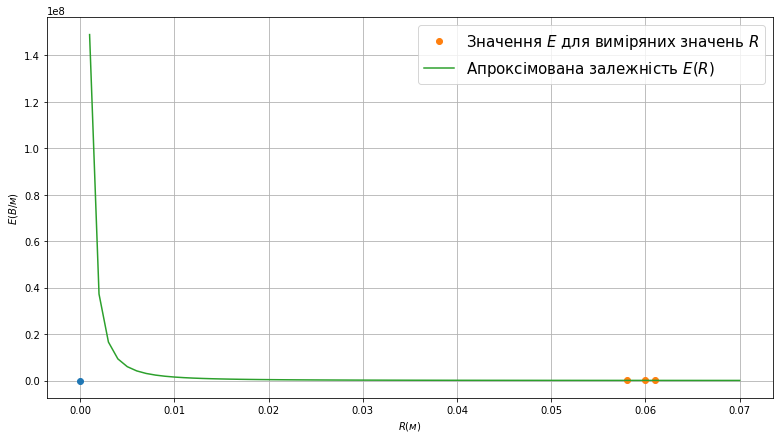

In [10]:
EExp = expData.apply(lambda row: koef[0] / row['R']**2 ,axis = 1)
print(EExp)
np.sqrt(np.divide(koef[0],E))

0    41361.406440
1    44263.098449
2    40016.410423
dtype: float64


0    0.059780
1    0.058775
2    0.060276
dtype: float64

In [11]:
deltaR = np.sqrt(0.001**2 + np.std(expData['R'], ddof = 0) / expData['R'].count())
eR = deltaR / expData['R'].mean() * 100
print(deltaR)
print(eR)

0.020414203624965373
34.213749092120736


$\Delta Q = \frac{\phi\Delta R}{k}$

In [12]:
deltaQ = expData['phi'].mean() / k * deltaR
eR = deltaQ / data['Q'][1] * 100
print(deltaQ)
print(eR)

5.678466201901925e-09
12.732351533242436


$\Delta E = \sqrt{(\frac{-2\Delta RkQ}{R^3})^2 + (\frac{k\Delta Q}{R^2})^2}$

In [13]:
deltaE = np.sqrt((2 * k * data['Q'][1] / data['R'].mean()**3 * deltaR)**2 + (k*deltaQ/expData['R'].mean()**2)**2)
eE = deltaE / data['E'][1] * 100
print(deltaE)
print(eE)

20742.19875187965
33.256658665513704
